In [2]:
# FUNCTION TO DISPLAY THE GROUND TRUTH AND PREDICTIONS FOR AN IMAGE SIDE BY SIDE 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
from pathlib import Path
from collections import Counter
import os 

# Function to draw bounding boxes
def draw_boxes(image, boxes, color, label):
    for box in boxes:
        x_center, y_center, width, height = box[1:5]
        x1 = int((x_center - width / 2) * image.shape[1])
        y1 = int((y_center - height / 2) * image.shape[0])
        x2 = int((x_center + width / 2) * image.shape[1])
        y2 = int((y_center + height / 2) * image.shape[0])
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return image
image_files = ["c2e3cd3c-27871334.jpg", "b1ca2e5d-84cf9134.jpg", "b1ebfc3c-cc9c2bb8.jpg", "b1e1a7b8-b397c445.jpg", "c02d414a-44e52614.jpg"]
# Define paths
image_path = "yolo_dataset/val/images" # Assuming image has same name as txt
pred_file = "YOLOv8/yolo_medium/predict/predict/labels"
gt_file = "yolo_dataset/val/labels"

# Load bounding boxes
def load_boxes(file_path):
    boxes = []
    with open(file_path, "r") as f:
        for line in f:
            parts = list(map(float, line.strip().split()))
            boxes.append(parts)
    return boxes



Total objects in Ground Truth: 15
Total objects in Predictions: 12
Class-wise counts in Ground Truth: Counter({7: 8, 2: 5, 9: 1, 6: 1})
Class-wise counts in Predictions: Counter({2: 6, 7: 4, 3: 2})


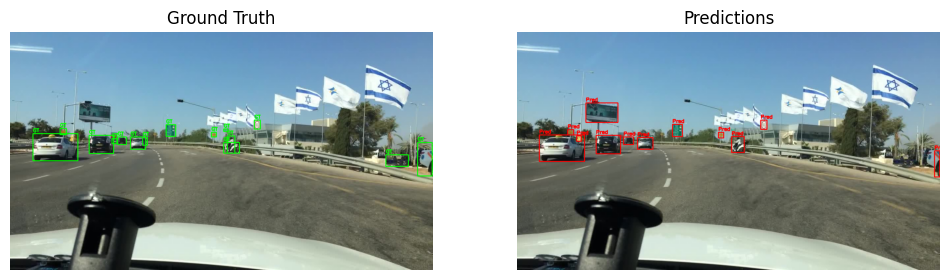

Total objects in Ground Truth: 35
Total objects in Predictions: 21
Class-wise counts in Ground Truth: Counter({3: 18, 7: 8, 1: 5, 2: 4})
Class-wise counts in Predictions: Counter({3: 8, 7: 7, 1: 3, 2: 3})


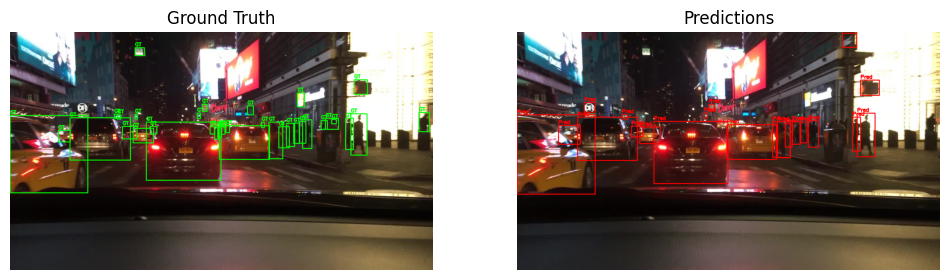

Total objects in Ground Truth: 26
Total objects in Predictions: 25
Class-wise counts in Ground Truth: Counter({3: 11, 7: 7, 1: 4, 2: 4})
Class-wise counts in Predictions: Counter({3: 10, 7: 8, 1: 4, 2: 3})


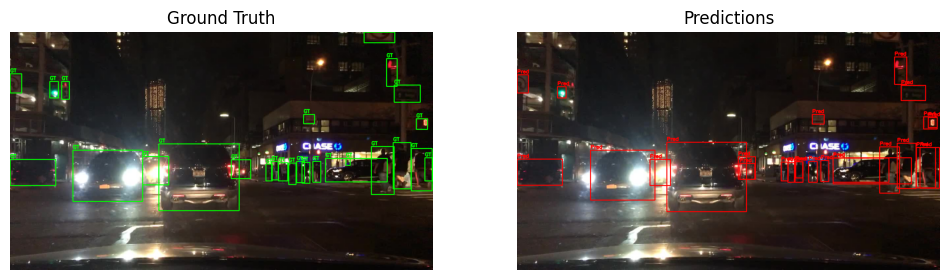

Total objects in Ground Truth: 22
Total objects in Predictions: 15
Class-wise counts in Ground Truth: Counter({7: 17, 5: 3, 2: 2})
Class-wise counts in Predictions: Counter({7: 14, 2: 1})


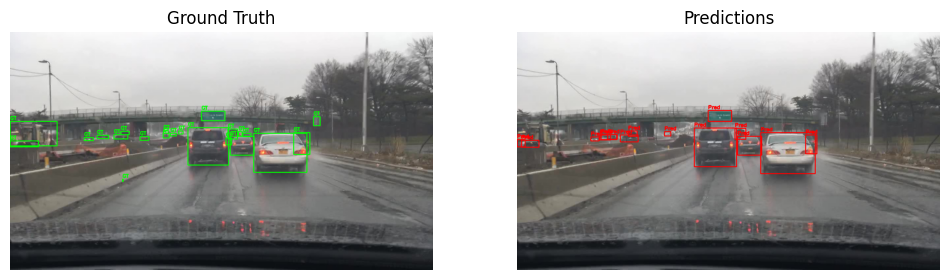

Total objects in Ground Truth: 17
Total objects in Predictions: 16
Class-wise counts in Ground Truth: Counter({7: 7, 1: 4, 3: 4, 2: 2})
Class-wise counts in Predictions: Counter({7: 8, 3: 3, 1: 3, 2: 2})


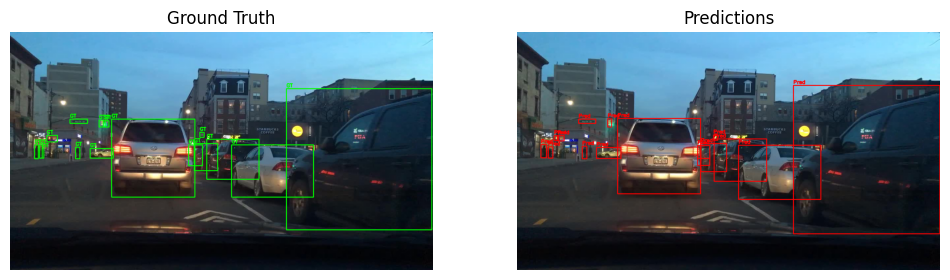

In [3]:

for img in image_files:
    image = cv2.imread(os.path.join(image_path, img))
    if image is None:
        raise FileNotFoundError(f"Image not found: {image_path}")
    gt_boxes = load_boxes(os.path.join(gt_file, (Path(img).stem + ".txt")))
    pred_boxes = load_boxes(os.path.join(pred_file, (Path(img).stem + ".txt")))

    # Count objects per class
    gt_classes = [int(box[0]) for box in gt_boxes]
    pred_classes = [int(box[0]) for box in pred_boxes]
    gt_counts = Counter(gt_classes)
    pred_counts = Counter(pred_classes)
    
    print(f"Total objects in Ground Truth: {len(gt_boxes)}")
    print(f"Total objects in Predictions: {len(pred_boxes)}")
    print("Class-wise counts in Ground Truth:", gt_counts)
    print("Class-wise counts in Predictions:", pred_counts)
    
    # Draw GT and predictions
    image_gt = draw_boxes(image.copy(), gt_boxes, (0, 255, 0), "GT")
    image_pred = draw_boxes(image.copy(), pred_boxes, (0, 0, 255), "Pred")
    
    # Display side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(image_gt, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Ground Truth")
    axes[0].axis("off")
    
    axes[1].imshow(cv2.cvtColor(image_pred, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Predictions")
    axes[1].axis("off")
    
    plt.show()